Issue with Google Colab: Must reinstall tornado, restart runtime, then run all.

In [ ]:
#!pip install -Iv tornado==5.1
!pip install -Uqq fastbook
#!pip install fastbook==0.0.7
!pip install fastai==2.6.3

In [ ]:
#!pip install fastai

Importing libraries and Google Drive:

In [ ]:

import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


Unzip Folder Containing Images

In [ ]:
!unzip '/content/gdrive/MyDrive/kaggle1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: kaggle1/X/X1603.jpg     
  inflating: kaggle1/X/X1605.jpg     
  inflating: kaggle1/X/X1606.jpg     
  inflating: kaggle1/X/X1607.jpg     
  inflating: kaggle1/X/X1609.jpg     
  inflating: kaggle1/X/X161.jpg      
  inflating: kaggle1/X/X1611.jpg     
  inflating: kaggle1/X/X1613.jpg     
  inflating: kaggle1/X/X1615.jpg     
  inflating: kaggle1/X/X1616.jpg     
  inflating: kaggle1/X/X1617.jpg     
  inflating: kaggle1/X/X1619.jpg     
  inflating: kaggle1/X/X1621.jpg     
  inflating: kaggle1/X/X1623.jpg     
  inflating: kaggle1/X/X1625.jpg     
  inflating: kaggle1/X/X1626.jpg     
  inflating: kaggle1/X/X1627.jpg     
  inflating: kaggle1/X/X1629.jpg     
  inflating: kaggle1/X/X163.jpg      
  inflating: kaggle1/X/X1631.jpg     
  inflating: kaggle1/X/X1633.jpg     
  inflating: kaggle1/X/X1635.jpg     
  inflating: kaggle1/X/X1636.jpg     
  inflating: kaggle1/X/X1637.jpg     
  inflating: kaggle1/X/X1639.jpg     



*   Specifying path to pictures
*   Get image files in designated path recursively.
*   Prints number of images by returning length of object 'fnames'.
*   Define function that labels images based on the name of the folder containing them.
*   Use this function and define dataset and how it is constructed.

DataLoader: Class which stores objects and in turn allows them to be used for training and validity.






In [ ]:
path= Path('/content/Eric')
fnames= get_image_files(path)
print(f"Total Image: {len(fnames)}")


Total Image: 2343



Datablock API: Customizing DataLoader;

*   Defining independent and dependent variables; in this case, we have a set of images as the independent variable, and categories as the dependent variable.
*   Get image files in designated path recursively.
*   Seperate 20% of images to make validation set
*  Folder names
*   Resize image to 224x244 pixels, to match resnset18 training image size.








In [ ]:
signs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))


*   Load images to be used by learner
*   Show random set of 12 images.



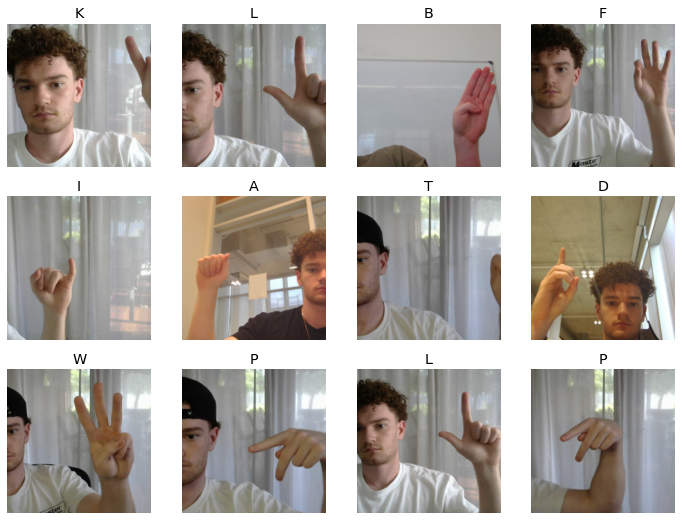

In [ ]:
dls = signs.dataloaders(path)
dls.valid.show_batch(max_n=12, nrows=3)

* Reloading images with a random crop to create further differentiation between pictures

In [ ]:
signs = signs.new(item_tfms=RandomResizedCrop(224, min_scale=0.1))
dls = signs.dataloaders(path)


*   Used to find a proper learner rate. In this case, we used the value 3E-3, which is also the default learner rate.



SuggestedLRs(valley=9.120108734350652e-05)

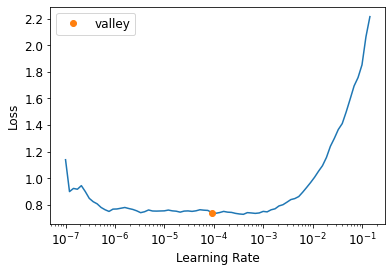

In [ ]:
learn.lr_find()



*   Initiating training using resnet18 architecture for transfer learning.

*   Training model with two epochs, running through the training set twice.



 

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,3.690413,1.236795,0.365385,00:28


epoch,train_loss,valid_loss,error_rate,time
0,1.583356,0.618633,0.190171,00:27
1,1.233077,0.412796,0.123932,00:27



*   Creating confusion matrix



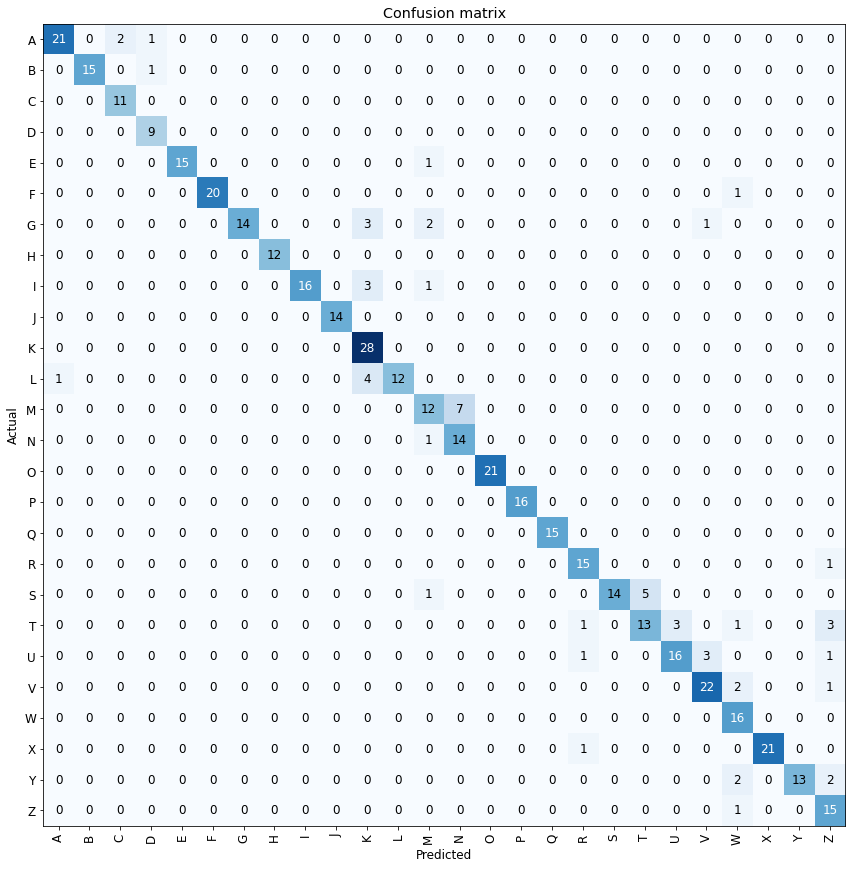

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12))

In [ ]:
#hide_output
#uploader = widgets.FileUpload()
#uploader

In [ ]:
#img = PILImage.create(uploader.data[0])


In [ ]:
learn.export()

WIDGET

In [ ]:
# learn_inf = load_learner('/content/export.pkl')

In [ ]:
# from fastai.vision.widgets import *
# btn_upload = widgets.FileUpload()
# btn_run= widgets.Button(description='Classify')
# out_pl = widgets.Output()
# lbl_pred = widgets.Label()

# def on_click_classify(change):

#     img=PILImage.create(btn_upload.data[-1])
#     out_pl.clear_output()
#     with out_pl: display(img.to_thumb(128,128))
#     pred,pred_idx,probs=learn_inf.predict(img)
#     lbl_pred.value= f'prediction= {pred}; Probability: {probs[pred_idx]:.04f}'

# btn_run.on_click(on_click_classify)

In [ ]:
# `VBox([widgets.Label('Select Hand Sign'),
#         btn_upload,btn_run,out_pl,lbl_pred])